In [2]:
import pandas as pd

# Create sample sales data
data = {
    "Date": pd.date_range(start="2025-01-01", periods=20, freq="D"),
    "Product": ["Apples", "Bananas", "Oranges", "Milk", "Bread"] * 4,
    "Quantity": [10, 15, 7, 20, 12] * 4,
    "Price": [2.5, 1.0, 1.2, 3.0, 2.0] * 4
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv("Sales.csv", index=False)

# Download the file
from google.colab import files
files.download("Sales.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
from google.colab import files

# Upload Sales.csv
uploaded = files.upload()

# Load data
df = pd.read_csv("Sales.csv")
print("Original Data:")
print(df.head())

# Check missing values
print("\nMissing values:")
print(df.isnull().sum())

# Fill missing Quantity with median (if any)
df["Quantity"].fillna(df["Quantity"].median(), inplace=True)

# Save cleaned file
df.to_csv("Sales_Cleaned.csv", index=False)
files.download("Sales_Cleaned.csv")
print("\n✅ Data cleaned and saved")


Saving Sales.csv to Sales (1).csv
Original Data:
         Date  Product  Quantity  Price
0  2025-01-01   Apples        10    2.5
1  2025-01-02  Bananas        15    1.0
2  2025-01-03  Oranges         7    1.2
3  2025-01-04     Milk        20    3.0
4  2025-01-05    Bread        12    2.0

Missing values:
Date        0
Product     0
Quantity    0
Price       0
dtype: int64


/tmp/ipython-input-2459171475.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Quantity"].fillna(df["Quantity"].median(), inplace=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Data cleaned and saved


        Quantity      Price
count  20.000000  20.000000
mean   12.800000   1.940000
std     4.560702   0.777581
min     7.000000   1.000000
25%    10.000000   1.200000
50%    12.000000   2.000000
75%    15.000000   2.500000
max    20.000000   3.000000


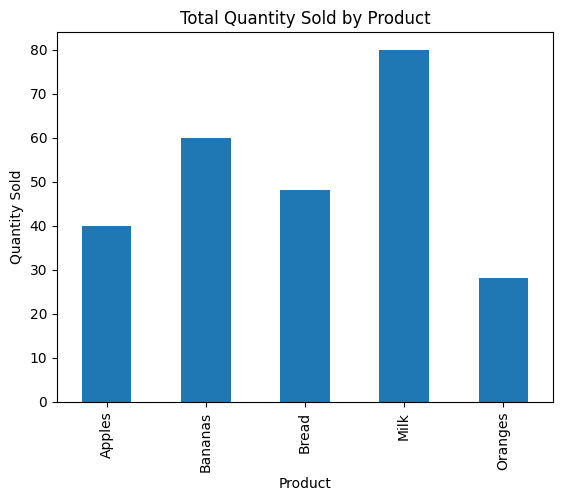

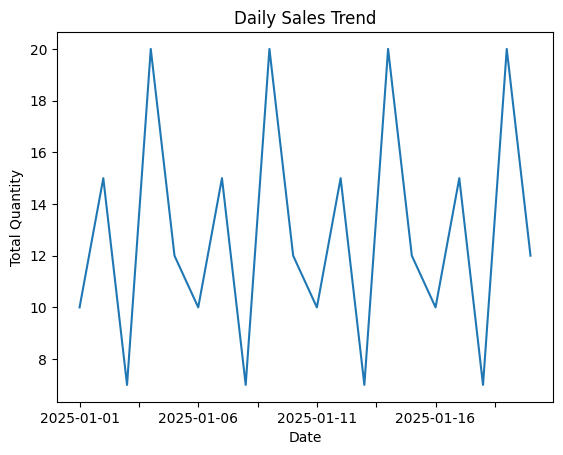

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Sales_Cleaned.csv")

# Summary statistics
print(df.describe())

# Total sales by product
df.groupby("Product")["Quantity"].sum().plot(kind="bar", title="Total Quantity Sold by Product")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.show()

# Daily sales trend
df.groupby("Date")["Quantity"].sum().plot(kind="line", title="Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Quantity")
plt.show()


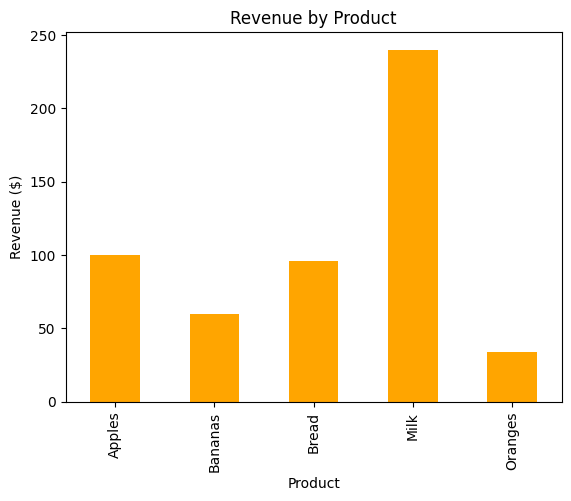

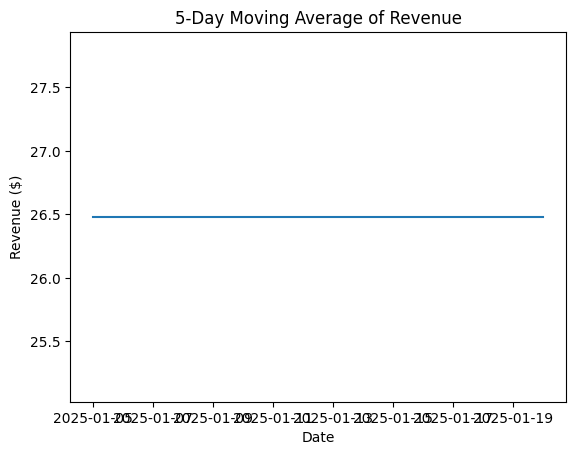

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Sales_Cleaned.csv")

# Calculate revenue
df["Revenue"] = df["Quantity"] * df["Price"]

# Revenue by product
df.groupby("Product")["Revenue"].sum().plot(kind="bar", color="orange", title="Revenue by Product")
plt.ylabel("Revenue ($)")
plt.show()

# 5-day moving average of revenue
df.groupby("Date")["Revenue"].sum().rolling(window=5).mean().plot(kind="line", title="5-Day Moving Average of Revenue")
plt.ylabel("Revenue ($)")
plt.show()


In [6]:
import pandas as pd

df = pd.read_csv("Sales_Cleaned.csv")

# Initial stock levels
initial_stock = {
    "Apples": 100,
    "Bananas": 120,
    "Oranges": 80,
    "Milk": 60,
    "Bread": 90
}

# Sold quantities
sold = df.groupby("Product")["Quantity"].sum().to_dict()

# Current stock
current_stock = {p: initial_stock[p] - sold.get(p, 0) for p in initial_stock}

# Reorder level
reorder_level = 30
reorder_list = [p for p, stock in current_stock.items() if stock < reorder_level]

print("📦 Current Stock:")
print(current_stock)

print("\n🔄 Products to Reorder:")
print(reorder_list)


📦 Current Stock:
{'Apples': 60, 'Bananas': 60, 'Oranges': 52, 'Milk': -20, 'Bread': 42}

🔄 Products to Reorder:
['Milk']
